### LOAN PREDICTION

In [252]:
#IMPORTING REQUIRED MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
#READING RAW DATA WITH THE HELP OF PANDAS MODULE

data=pd.read_csv(r"C:\Users\deban\Desktop\Programs\Personal\LoanPrediction\train.csv")

In [254]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [255]:
data.shape

(614, 13)

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [257]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [258]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

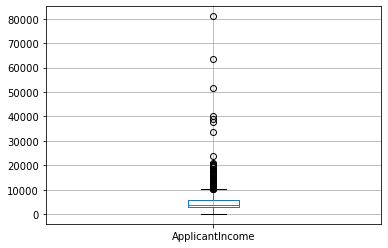

In [259]:
data.boxplot(column="ApplicantIncome")

<AxesSubplot:>

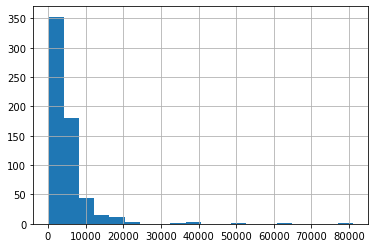

In [260]:
data['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

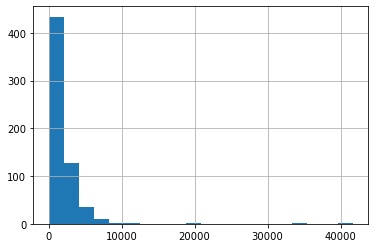

In [261]:
data['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:>

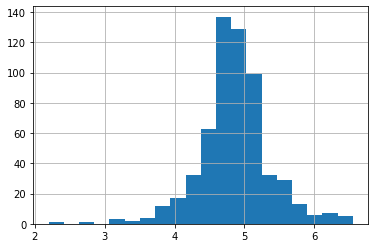

In [262]:
#NORMALISING ABSURD DATA

data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

In [263]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [264]:
#FILLING UP NULL VALUES OF THE DATASET WITH APPROPRIATE VALUES

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())
data.LoanAmount_log=data.Loan_Amount_Term.fillna(data.LoanAmount_log.mean())
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [265]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [266]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

<AxesSubplot:>

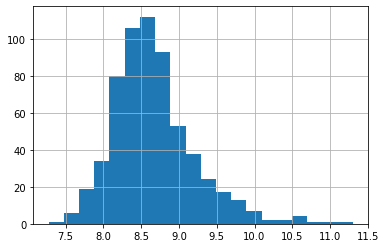

In [267]:
data['TotalIncome_log']=np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)

In [268]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,360.0,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,360.0,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,360.0,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,360.0,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,360.0,6000.0,8.699515


In [269]:
#STORING DEPENDENT AND INDEPENDENT DATA IN DIFFERENT VARIABLES

x=data.iloc[:,np.r_[1:5,9:11,13:15]].values
y=data.iloc[:,12].values

In [270]:
x

array([['Male', 'No', '0', ..., 1.0, 360.0, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 360.0, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 360.0, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 360.0, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 360.0, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 360.0, 4583.0]], dtype=object)

In [271]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [272]:
#IMPORTING REQUIRED MODULE AND TRAINING THE MODEL

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)

In [273]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 360.0 5858.0]
 ['Male' 'No' '1' ... 1.0 360.0 11250.0]
 ['Male' 'Yes' '0' ... 0.0 360.0 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 360.0 8334.0]
 ['Male' 'Yes' '0' ... 1.0 360.0 6033.0]
 ['Female' 'Yes' '0' ... 1.0 360.0 6486.0]]


In [274]:
#ENCODING REQUIRED DATA

from sklearn.preprocessing import LabelEncoder
labelEncoder_x=LabelEncoder()

In [275]:
for i in range(0,5):
    x_train[:,i]=labelEncoder_x.fit_transform(x_train[:,i])

In [276]:
x_train[:,7]:labelEncoder_x.fit_transform(x_train[:,7])

In [277]:
x_train

array([[1, 1, 0, ..., 1.0, 360.0, 5858.0],
       [1, 0, 1, ..., 1.0, 360.0, 11250.0],
       [1, 1, 0, ..., 0.0, 360.0, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 360.0, 8334.0],
       [1, 1, 0, ..., 1.0, 360.0, 6033.0],
       [0, 1, 0, ..., 1.0, 360.0, 6486.0]], dtype=object)

In [278]:
labelEncoder_y=LabelEncoder()
y_train=labelEncoder_y.fit_transform(y_train)

In [279]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [280]:
for i in range(0,5):
    x_test[:,i]=labelEncoder_x.fit_transform(x_test[:,i])

In [281]:
x_train[:,7]:labelEncoder_x.fit_transform(x_train[:,7])

In [282]:
labelEncoder_y=LabelEncoder()
y_test=labelEncoder_y.fit_transform(y_test)

In [283]:
x_test

array([[1, 0, 0, 0, 6, 1.0, 360.0, 7085.0],
       [0, 0, 0, 0, 6, 1.0, 360.0, 4230.0],
       [1, 1, 0, 0, 6, 1.0, 360.0, 10039.0],
       [1, 1, 0, 0, 6, 1.0, 360.0, 6784.0],
       [1, 1, 2, 0, 6, 1.0, 360.0, 3875.0],
       [1, 1, 0, 1, 3, 0.0, 180.0, 6058.0],
       [1, 1, 3, 0, 3, 1.0, 180.0, 6417.0],
       [1, 0, 0, 0, 6, 1.0, 360.0, 12876.0],
       [1, 0, 0, 0, 5, 0.0, 342.0, 5124.0],
       [1, 1, 0, 0, 6, 1.0, 360.0, 5233.0],
       [0, 0, 0, 0, 6, 1.0, 360.0, 2917.0],
       [1, 1, 1, 0, 6, 1.0, 360.0, 2895.0],
       [0, 0, 0, 0, 6, 1.0, 360.0, 8333.0],
       [1, 1, 2, 0, 6, 1.0, 360.0, 8667.0],
       [1, 1, 0, 0, 6, 1.0, 360.0, 14880.0],
       [1, 1, 1, 0, 6, 1.0, 360.0, 3875.0],
       [1, 0, 1, 1, 6, 1.0, 360.0, 4311.0],
       [1, 0, 0, 1, 6, 1.0, 360.0, 3946.0],
       [0, 0, 0, 0, 6, 1.0, 360.0, 2500.0],
       [1, 1, 0, 1, 6, 0.0, 360.0, 4787.0],
       [0, 1, 0, 0, 6, 0.0, 360.0, 6085.0],
       [1, 1, 0, 0, 6, 1.0, 360.0, 4765.0],
       [1, 1, 2, 0, 6, 1.0, 3

In [284]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [285]:
#SCALING DATA

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

### DECISION TREE CLASSIFIER ALGORITHM

In [286]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [287]:
y_pred_DTC=DTClassifier.predict(x_test)
y_pred_DTC

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [288]:
from sklearn import metrics
final1=metrics.accuracy_score(y_pred_DTC,y_test)
final1=final1*100
final1="{:.2f}".format(final1)
print("Accuracy report of Decision Tree Classifier is:",final1,"%")

Accuracy report of Decision Tree Classifier is: 67.48 %


### K-NEAREST NEIGHBOUR ALGORITHM

In [289]:
from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNClassifier.fit(x_train, y_train)

KNeighborsClassifier()

In [290]:
y_pred_KNC=KNClassifier.predict(x_test)
y_pred_KNC

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [291]:
final2=metrics.accuracy_score(y_pred_KNC,y_test)
final2=final2*100
final2="{:.2f}".format(final2)
print("Accuracy report of K-Nearest Neighbour is:",final2,"%")

Accuracy report of K-Nearest Neighbour is: 77.24 %


### SUPPORT VECTOR MACHINE ALGORITHM

In [292]:
from sklearn.svm import SVC
SVClassifier = SVC(kernel = 'linear', random_state = 0)
SVClassifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [293]:
y_pred_SVC=SVClassifier.predict(x_test)
y_pred_SVC

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [294]:
final3=metrics.accuracy_score(y_pred_SVC,y_test)
final3=final3*100
final3="{:.2f}".format(final3)
print("Accuracy report of Support Vector Machine Algorithm is:",final3,"%")

Accuracy report of Support Vector Machine Algorithm is: 82.93 %


### NAIVE BAYES ALGORITHM

In [295]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [296]:
y_pred=NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [297]:
final4=metrics.accuracy_score(y_pred,y_test)
final4=final4*100
final4="{:.2f}".format(final4)
print("Accuracy report of Naive Bayes Classifier Algorithm is:",final4,"%")

Accuracy report of Naive Bayes Classifier Algorithm is: 83.74 %


### TESTING MODULE WITH NAIVE BAYES ALGORITHM

In [298]:
test=pd.read_csv(r"C:\Users\deban\Desktop\Programs\Personal\LoanPrediction/test.csv")

In [299]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [300]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [301]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test.LoanAmount=test.LoanAmount.fillna(test.LoanAmount.mean())

In [302]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [303]:
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']
test['TotalIncome_log']=np.log(test['TotalIncome'])

In [304]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [305]:
test1=test.iloc[:,np.r_[1:5,9:11,13:15]].values

In [306]:
for i in range(0,5):
    test1[:,i]=labelEncoder_x.fit_transform(test1[:,i])

In [307]:
test1[:,7]:labelEncoder_x.fit_transform(test1[:,7])

In [308]:
test1

array([[1, 1, 0, ..., 1.0, 5720, 8.651724084373843],
       [1, 1, 1, ..., 1.0, 4576, 8.428580533059634],
       [1, 1, 2, ..., 1.0, 6800, 8.824677891164198],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 8.564649132572534],
       [1, 1, 0, ..., 1.0, 7393, 8.9082888855571],
       [1, 0, 0, ..., 1.0, 9200, 9.126958763037132]], dtype=object)

In [309]:
test1=ss.fit_transform(test1)

In [310]:
pred=NBClassifier.predict(test1)

In [311]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [312]:
#STORING YES/NO INTO SEPERATE LISTS TO PLOT

pred_1=[]
pred_0=[]
for i in range(len(pred1)):
    if pred[i]==1:
        pred_1.append(i)
    else:
        pred_0.append(i)

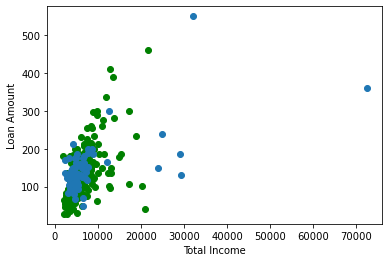

In [313]:
#PLOTTING APPROVAL OR DENIAL OF LOAN VISUALLY USING SCATTERPLOT

plt.scatter(test['TotalIncome'][pred_1],test['LoanAmount'][pred_1],color='green')
plt.scatter(test['TotalIncome'][pred_0],test['LoanAmount'][pred_0])
plt.xlabel("Total Income")
plt.ylabel("Loan Amount")
plt.show()

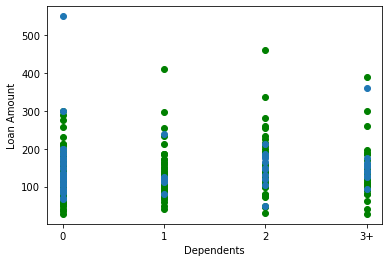

In [314]:
plt.scatter(test['Dependents'][pred_1],test['LoanAmount'][pred_1],color='green')
plt.scatter(test['Dependents'][pred_0],test['LoanAmount'][pred_0])
plt.xlabel("Dependents")
plt.ylabel("Loan Amount")
plt.show()

# RESULT
## Accuracy report of Decision Tree Classifier Algorithm is: 67.48 %
## Accuracy report of K-Nearest Neighbour Algorithm is: 77.24 %
## Accuracy report of Support Vector Machine Algorithm is: 82.93 %
## Accuracy report of Naive Bayes Classifier Algorithm is: 83.74 %

### Since Naive Bayes Classifier Algorithm has the highest accuracy percentage , we tested our model with our test data and represented approval or denial of Loan visually.

# THANK YOU